In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# création d'une grille régulière

In [20]:
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)

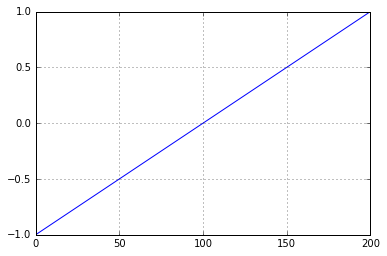

In [21]:
plt.plot(x)
plt.grid()

In [22]:
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

In [23]:
z.shape

(200, 200)

# affichage d'une fonction à deux variables z

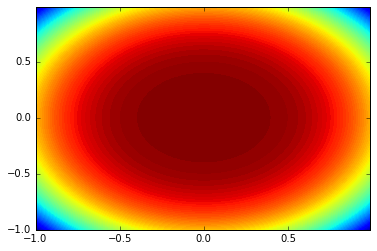

In [24]:
h = plt.contourf(x,y,z,100)

# illustration par un exemple physique : 
illustrer le champ électrique dû à une charge $q_0$ dans le vide

In [25]:
from IPython.display import HTML

In [8]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Cai3AQd2LPs?t=762&rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# calcul du champ dû à une charge à une certaine position de l'espace

In [26]:
from scipy.constants import epsilon_0

def E_field(q0,p0,p):
    "Returns the field(amplitude,angle) at p generated by a charge q0 located p0"
    k_c = 1./(4*np.pi*epsilon_0)
    r = np.asarray(p)-p0
    n = np.linalg.norm(r)
    r_norm = r/n    
    E = k_c*q0/(n**2)
    phi = np.arctan2(r_norm[1], r_norm[0])
    return (E,phi)


In [34]:
q0 = 1
p0 = np.asarray((.5,.5))

E_field(q0,p0,(.5,.5)) # ! div0 --> (0,0)

/home/olivier/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/home/olivier/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


(inf, nan)

# calcul du champ en tout point de l'espace

In [35]:
def compute_E(q0,p0,xx,yy):
    E = np.zeros_like(xx)
    phi = np.zeros_like(xx)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            E[i,j],phi[i,j] = E_field(q0,p0,(xx[i,j],yy[i,j]))
    return E,phi

In [36]:
E,phi = compute_E(q0,p0,xx,yy)


# affichage de la direction du champ

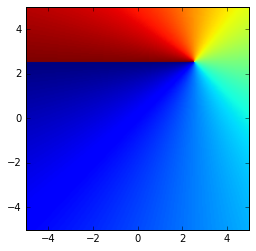

In [37]:
plt.imshow(phi,extent=[-5,5,5,-5]);
plt.gca().invert_yaxis()

# affichage de l'intensité du champ

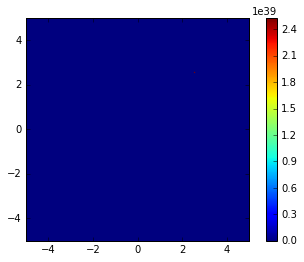

In [38]:
plt.imshow(E,extent=[-5,5,5,-5])
plt.gca().invert_yaxis()
plt.colorbar();

In [39]:
np.min(E),np.max(E)

(1997233730.526262, 2.5317945372976819e+39)

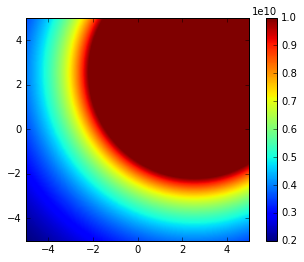

In [42]:
plt.imshow(E,extent=[-5,5,5,-5],vmax=1e10)
plt.gca().invert_yaxis()
plt.colorbar();

# affichage vectoriel

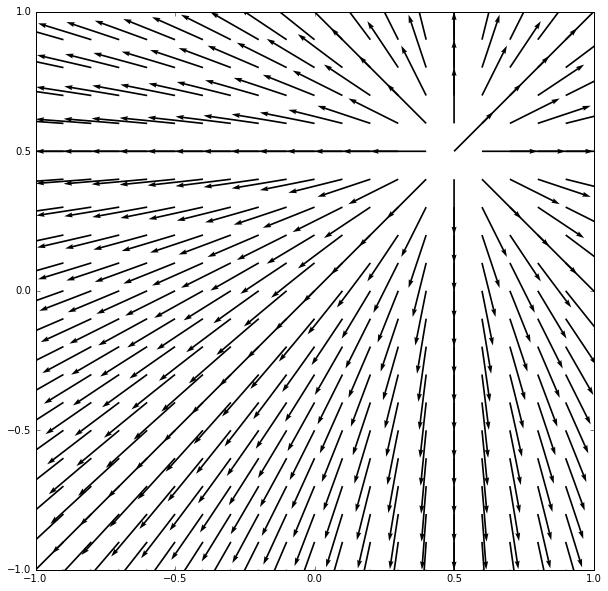

In [43]:
u = np.cos(phi)
v = np.sin(phi)
plt.figure(figsize=[10,10])
plt.quiver(xx[::10,::10],yy[::10,::10],u[::10,::10],v[::10,::10],angles='xy',scale=10)

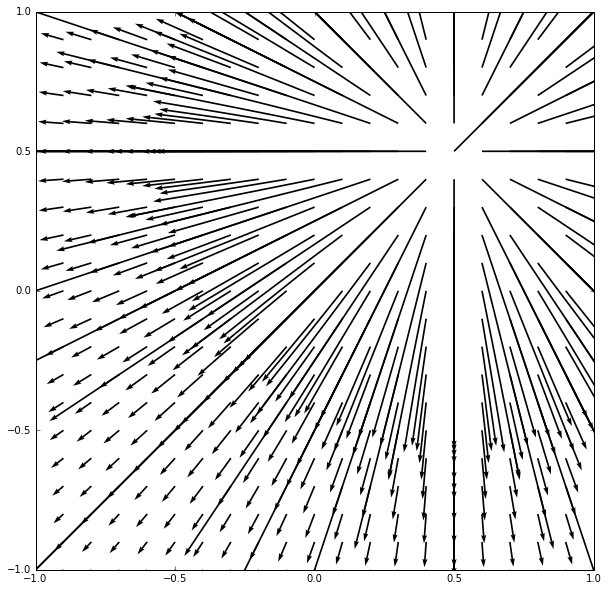

In [44]:
u = E*np.cos(phi)
v = E*np.sin(phi)
plt.figure(figsize=[10,10])
plt.quiver(xx[::10,::10],yy[::10,::10],u[::10,::10],v[::10,::10],angles='xy',scale=1e11);

In [45]:
E

array([[  1.99723373e+09,   2.01059300e+09,   2.02404103e+09, ...,
          3.63735958e+09,   3.62342839e+09,   3.60931360e+09],
       [  2.01059300e+09,   2.02413220e+09,   2.03776256e+09, ...,
          3.68191388e+09,   3.66763999e+09,   3.65317933e+09],
       [  2.02404103e+09,   2.03776256e+09,   2.05157775e+09, ...,
          3.72726404e+09,   3.71263706e+09,   3.69782011e+09],
       ..., 
       [  3.63735958e+09,   3.68191388e+09,   3.72726404e+09, ...,
          2.03430326e+10,   1.99148056e+10,   1.94957739e+10],
       [  3.62342839e+09,   3.66763999e+09,   3.71263706e+09, ...,
          1.99148056e+10,   1.95042356e+10,   1.91021292e+10],
       [  3.60931360e+09,   3.65317933e+09,   3.69782011e+09, ...,
          1.94957739e+10,   1.91021292e+10,   1.87162678e+10]])